# Number density evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from plot_helper import animate_field
import os 
import sys
sys.path.append('../..')
from configs.config import *
%config InlineBackend.figure_format = 'retina' # disable this if not using a retina display

In [2]:
# load grid data
grid = np.load(os.path.join(raw_data_path), allow_pickle=True)
x_array, y_array, z_array = grid

## Proton

In [3]:
proton_density = np.load('/users/PAS2137/wang15032/EpochSims/data/3d/raw/2023-07-28/Proton_Derived_Number_Density_smovie_xy_0_33_1.npy', allow_pickle=True)

### Linear scale

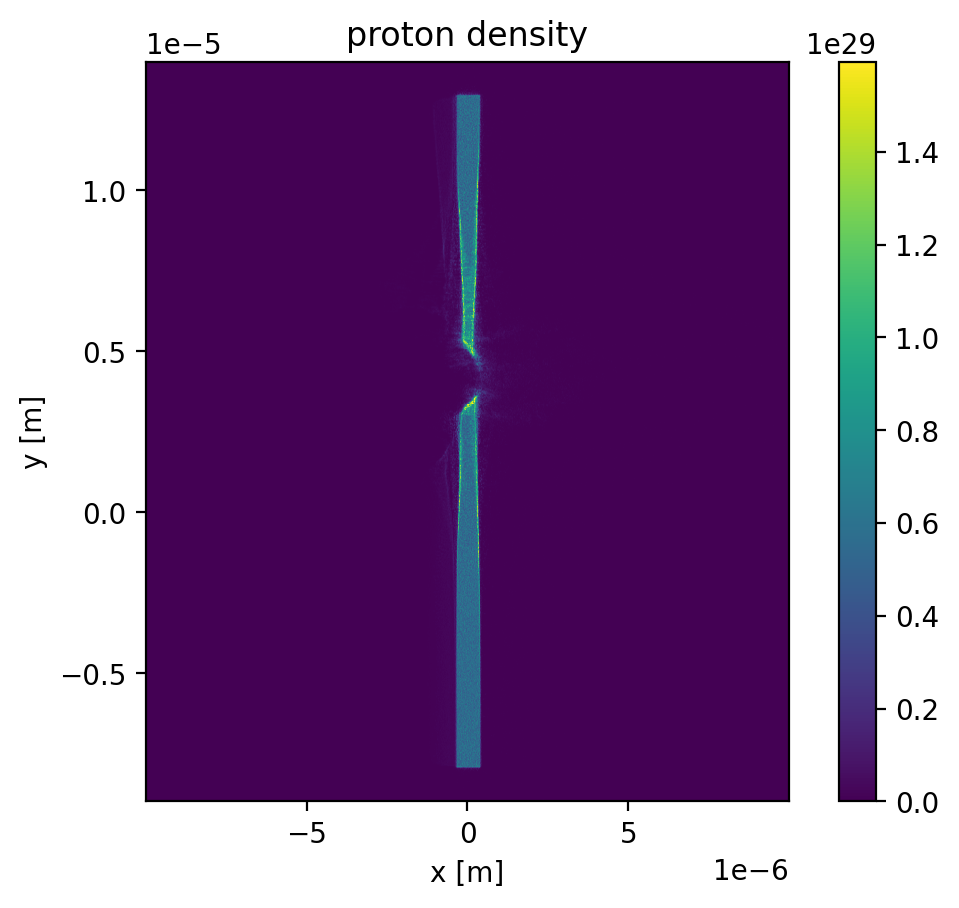

In [4]:
# call animate_density and save animation
extent = [x_array[0], x_array[-1], y_array[0], y_array[-1]]
ani, ax = animate_field(proton_density, extent)

# set axes label
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'proton density')
ani.save(f'./images/proton_density_xy.gif', fps=10, dpi=300)

### Log scale

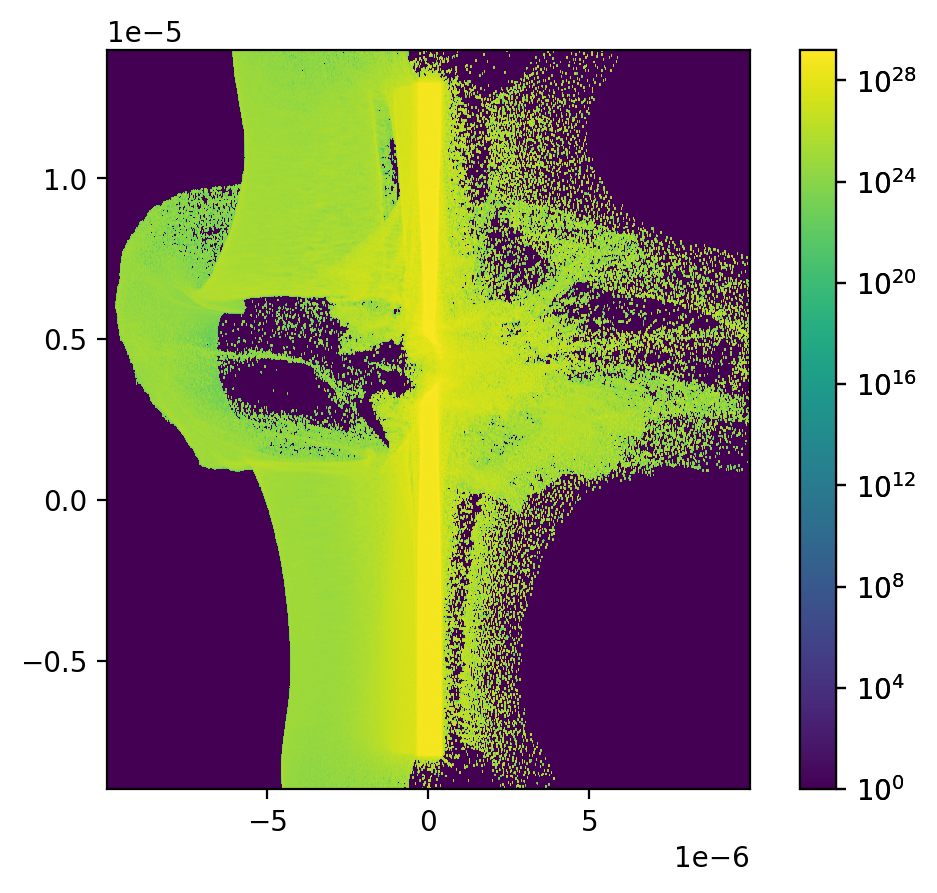

In [13]:
species = 'proton'
ani, ax = animate_field(proton_density + 1, extent, log_scale=True)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'{species} density')
ani.save(f'./images/{species}_density_log_xy.gif', fps=10, dpi=300)

## Electron

In [5]:
electron_density = np.load('/users/PAS2137/wang15032/EpochSims/data/3d/raw/2023-07-28/Electron_Derived_Number_Density_smovie_xy_0_33_1.npy', allow_pickle=True)

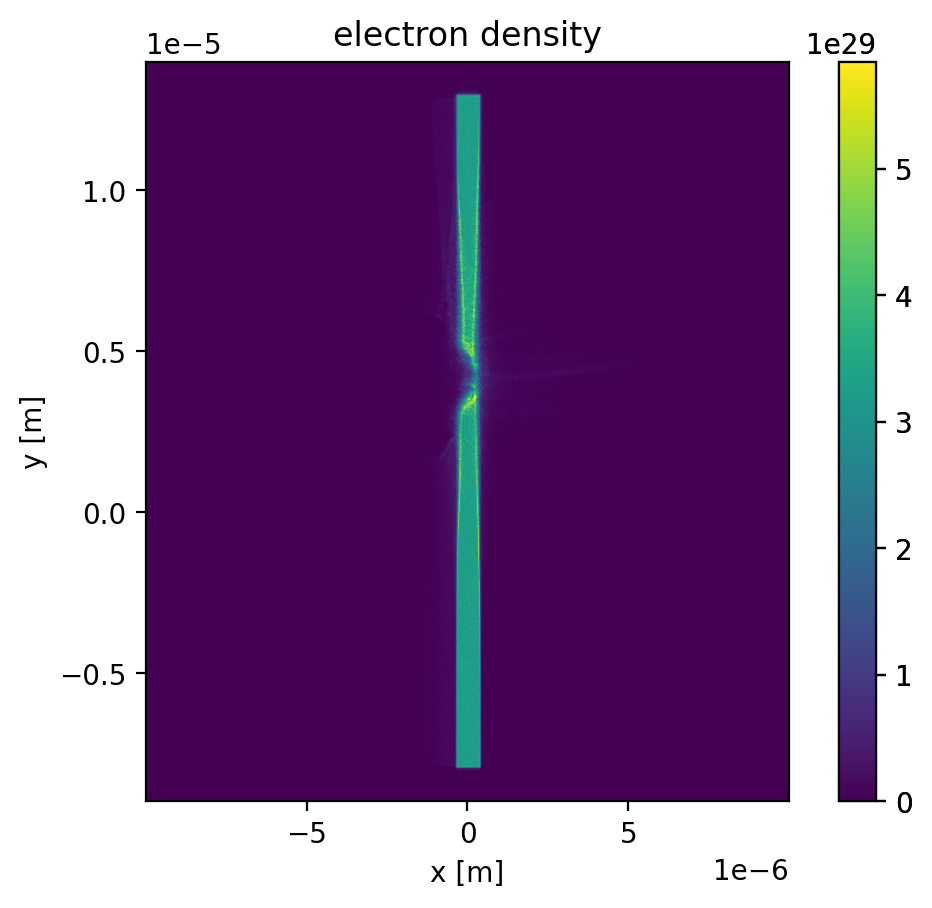

In [17]:
species = 'electron'
ani, ax = animate_field(electron_density, extent)

# set axes label
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'{species} density')
ani.save(f'./images/{species}_density_xy.gif', fps=10, dpi=300)

## Carbon 

In [9]:
carbon_density = np.load('/users/PAS2137/wang15032/EpochSims/data/3d/raw/2023-07-28/Carbon_Derived_Number_Density_smovie_xy_0_33_1.npy', allow_pickle=True)

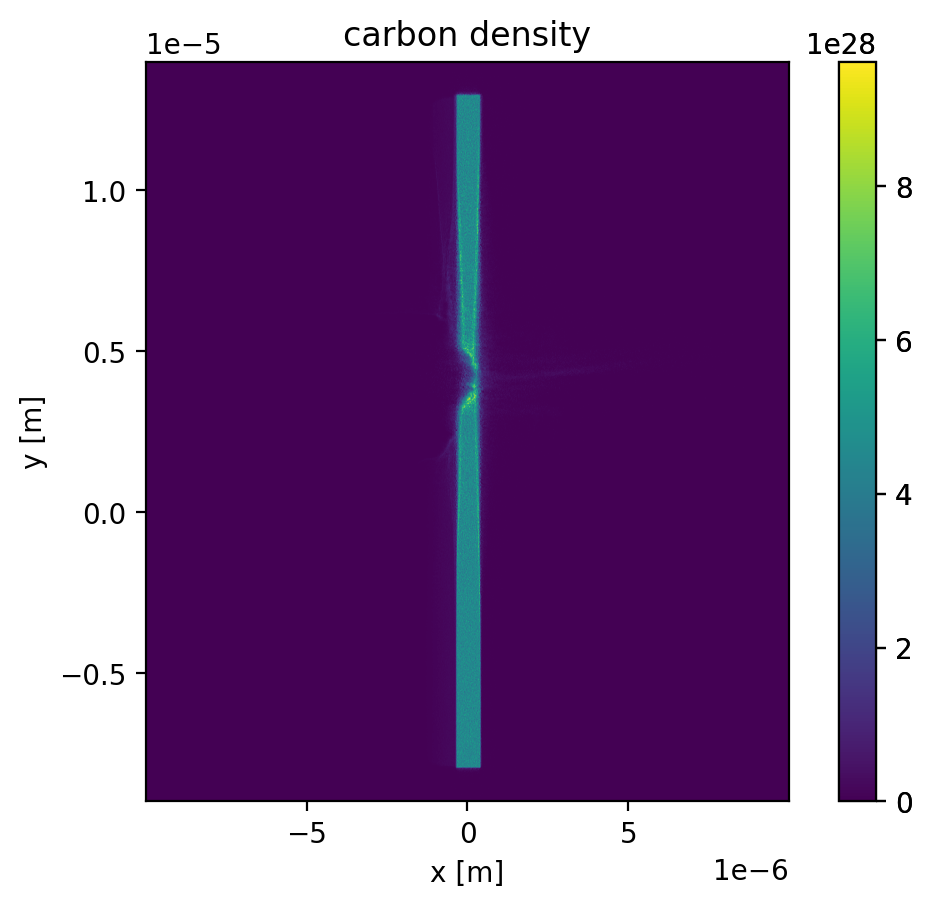

In [10]:
species = 'carbon'
ani, ax = animate_field(carbon_density, extent)

# set axes label
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'{species} density')
ani.save(f'./images/{species}_density_xy.gif', fps=10, dpi=300)

## All Together

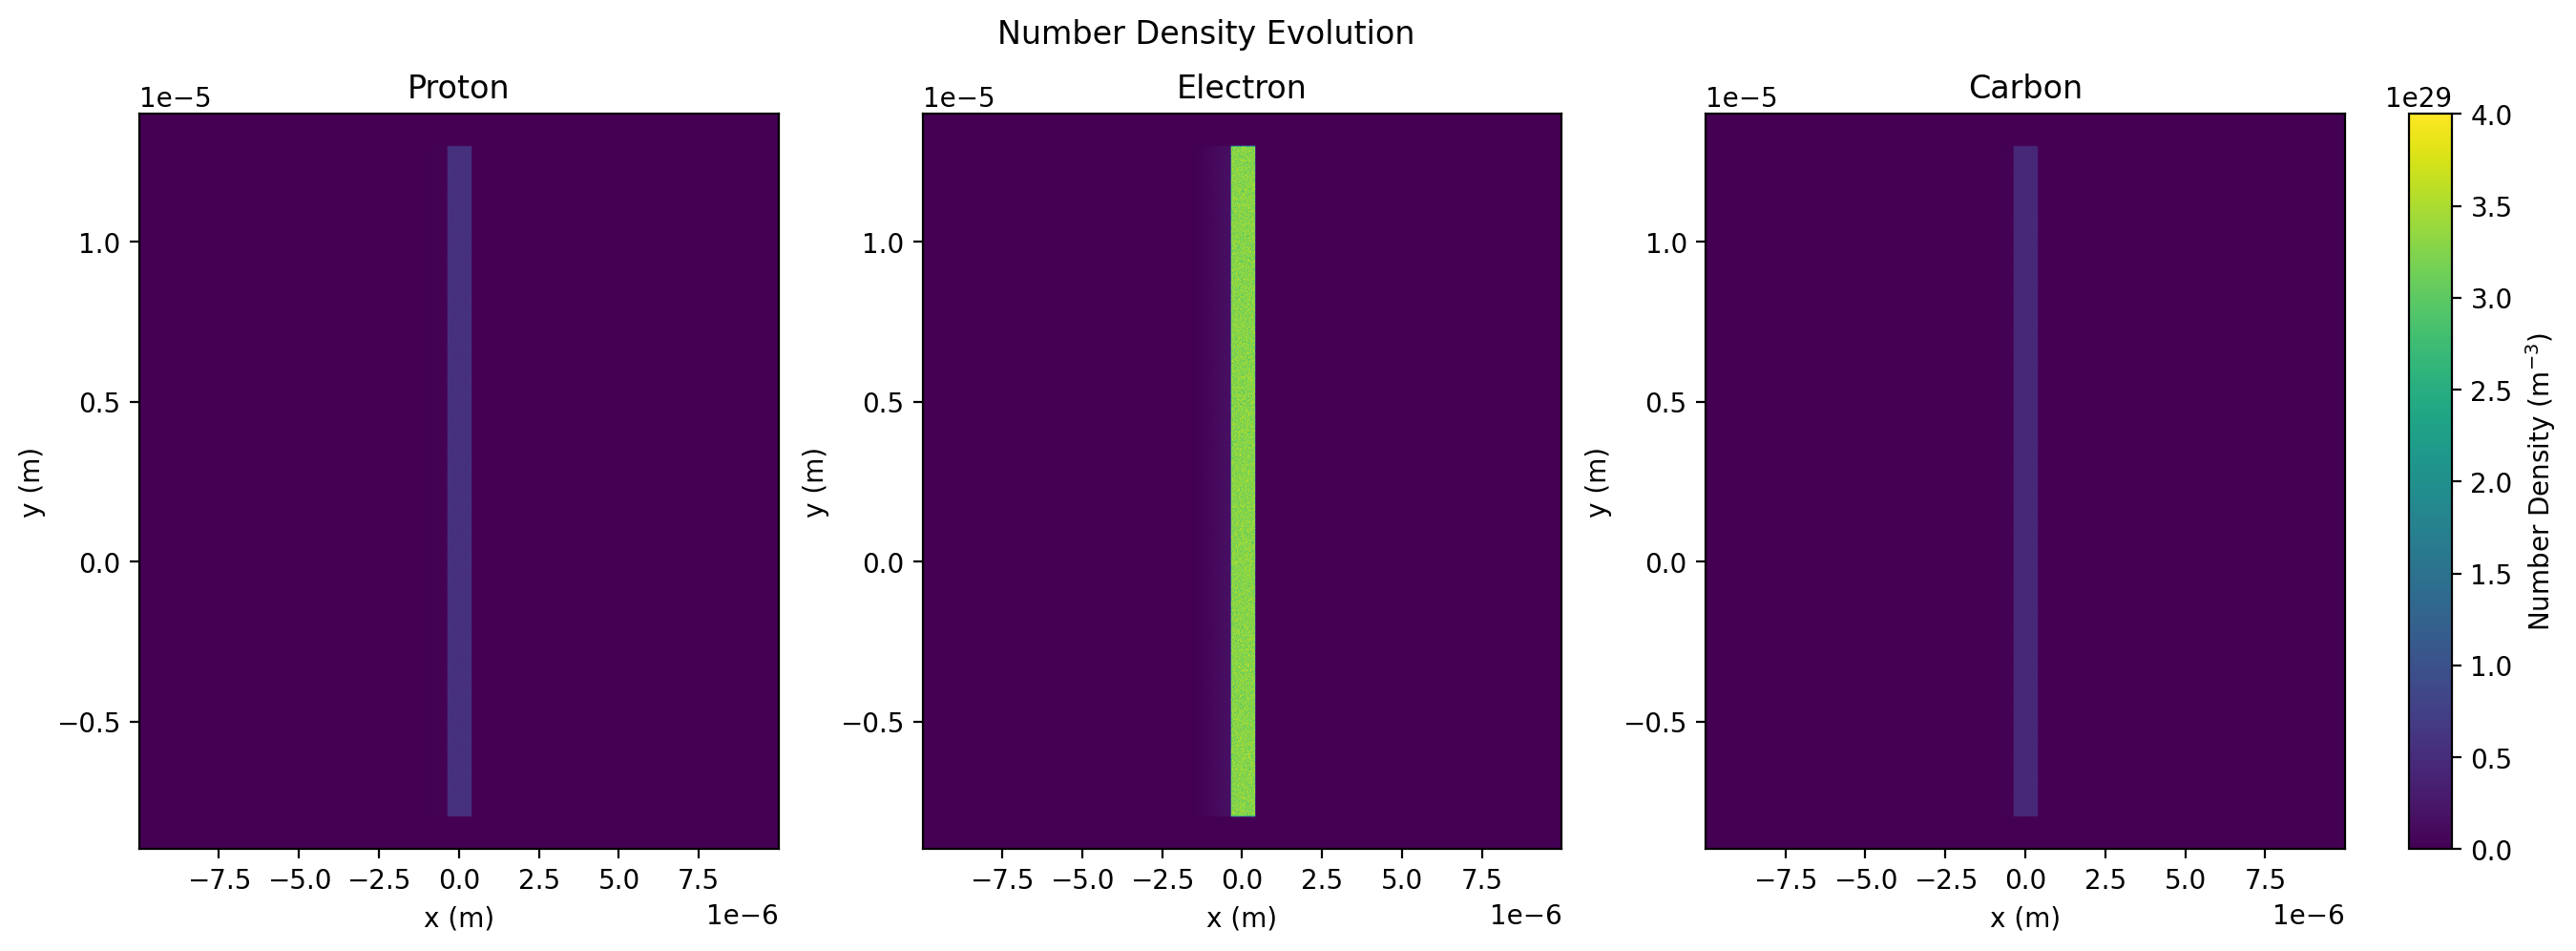

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

# Create the initial figure with three subplots and colorbars
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cbar_ax = fig.add_axes([.92, 0.11, 0.015, 0.77])

densities = [proton_density, electron_density, carbon_density]
titles = ['Proton', 'Electron', 'Carbon']
images = []

vmin = 0
vmax = 4e29

for ax, density, title in zip(axs, densities, titles):
    img = ax.imshow(density[0, :, :].T, origin='lower', extent=[x_array[0], x_array[-1], y_array[0], y_array[-1]], interpolation='nearest', vmin=vmin, vmax=vmax)
    images.append(img)
    ax.set_title(title)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')

fig.colorbar(images[0], cax=cbar_ax, label=r'Number Density (m$^{-3}$)')
fig.suptitle('Number Density Evolution')

# Define an update function for the animation
def update(i):
    for img, density in zip(images, densities):
        img.set_array(density[i, :, :].T)

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(proton_density.shape[0]), blit=False)

plt.show()


In [45]:
# save animation
ani.save('./images/density_xy.gif', fps=10, dpi=300)

/users/PAS2137/wang15032/.conda/envs/general/lib/python3.10/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
